In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/clean_data.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (101766, 2414)
   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  ...  insulin_Up  \
0                

In [2]:
X = df.drop(columns=["readmitted_30days"]) #splits features and target
y = df["readmitted_30days"]

X_train, X_test, y_train, y_test = train_test_split( #train and test split
    X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
logit = LogisticRegression(max_iter=1000, n_jobs=-1)
logit.fit(X_train, y_train) #initalize model and fit on training data

#predict on test data
y_pred_log = logit.predict(X_test)
y_proba_log = logit.predict_proba(X_test)[:, 1]

acc_log = accuracy_score(y_test, y_pred_log)
prec_log, rec_log, f1_log, _ = precision_recall_fscore_support(y_test, y_pred_log, average="binary", zero_division=0)
auc_log = roc_auc_score(y_test, y_proba_log)

print(f"Logistic Regression → acc={acc_log:.3f}, prec={prec_log:.3f}, rec={rec_log:.3f}, f1={f1_log:.3f}, auc={auc_log:.3f}")

/Users/peteramajor/HealthCare analysis/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression → acc=0.888, prec=0.481, rec=0.017, f1=0.033, auc=0.646


In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train) #intialize data and limit depth for better interprebility then fit on tranining data

y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

acc_tree = accuracy_score(y_test, y_pred_tree) # evaluate performance
prec_tree, rec_tree, f1_tree, _ = precision_recall_fscore_support(y_test, y_pred_tree, average="binary", zero_division=0)
auc_tree = roc_auc_score(y_test, y_proba_tree)

print(f"Decision Tree - acc={acc_tree:.3f}, prec={prec_tree:.3f}, rec={rec_tree:.3f}, f1={f1_tree:.3f}, auc={auc_tree:.3f}")

Decision Tree - acc=0.888, prec=0.513, rec=0.009, f1=0.017, auc=0.659


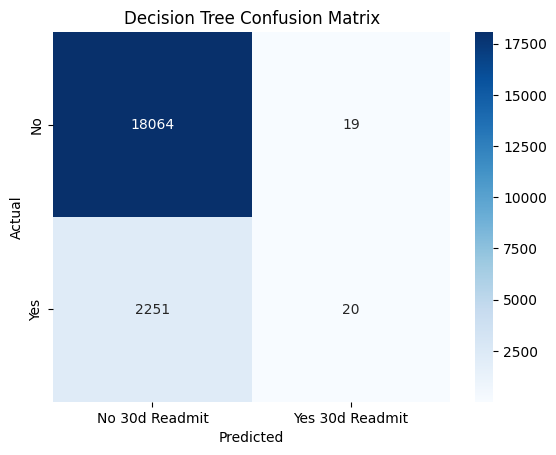

In [6]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No 30d Readmit","Yes 30d Readmit"], yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

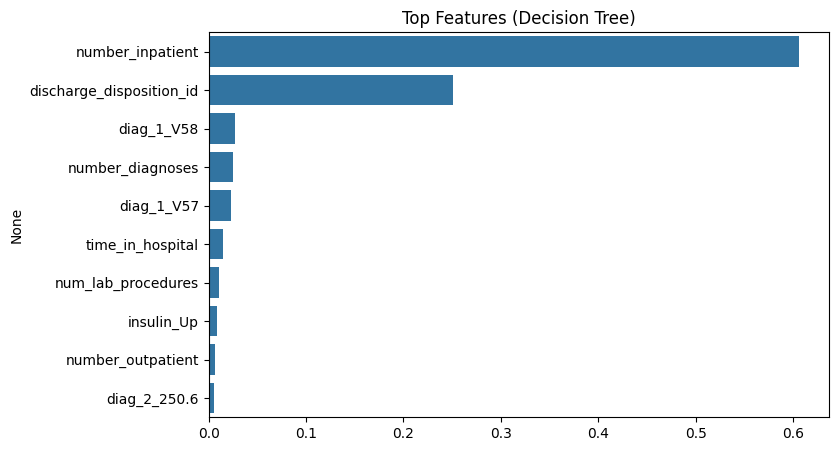

In [7]:
importances = pd.Series(tree.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top Features (Decision Tree)")
plt.show()

### Resilits
- Logistic Regression achieved **~88% accuracy**, but recall was very low.  
- Decision Tree showed similar accuracy, with slightly higher precision.  
- Both models struggle with recall due to **class imbalance** (far fewer positive readmissions than negatives).  

This highlights the challenge of predicting rare events in healthcare datasets.